In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # Import seaborn and matplotlib for visualizing
import matplotlib.pyplot as plt
from itertools import islice
import json

### sklearn to predict party affiliation
Here we will work with data consisting of votes made by US House of Representatives Congressmen.  Dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) consisting of votes made by US House of Representatives Congressmen.

The goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. 

### Load the data

In [2]:
head_list = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df = pd.read_csv('house-votes.csv', names=head_list)

### Inspect the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    object
 2   water              435 non-null    object
 3   budget             435 non-null    object
 4   physician          435 non-null    object
 5   salvador           435 non-null    object
 6   religious          435 non-null    object
 7   satellite          435 non-null    object
 8   aid                435 non-null    object
 9   missile            435 non-null    object
 10  immigration        435 non-null    object
 11  synfuels           435 non-null    object
 12  education          435 non-null    object
 13  superfund          435 non-null    object
 14  crime              435 non-null    object
 15  duty_free_exports  435 non-null    object
 16  eaa_rsa            435 non-null    object
dt

In [4]:
df.describe()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,0,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [5]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


<span class="mark">**What do you notice as you inspect?**</span>

In [6]:
df.shape

(435, 17)

In [11]:
df == '?'

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
431,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
432,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
433,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False


In [14]:
df[df == '?'].count()

party                0
infants              0
water                0
budget               0
physician            0
salvador             0
religious            0
satellite            0
aid                  0
missile              0
immigration          0
synfuels             0
education            0
superfund            0
crime                0
duty_free_exports    0
eaa_rsa              0
dtype: int64

### Cleaning data

We can see through our EDA that there are certain data points labeled with a '?'. These denote missing values. Real-world data can be very messy. (recall EDA lecture from previous classes). Missing values can be encoded in different ways in real-world data.


We will use NaN to encode missing values during data cleaning because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as `.dropna()` and `.fillna()`, as well as scikit-learn's Imputation transformer `Imputer()`.

In [15]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                0
infants              0
water                0
budget               0
physician            0
salvador             0
religious            0
satellite            0
aid                  0
missile              0
immigration          0
synfuels             0
education            0
superfund            0
crime                0
duty_free_exports    0
eaa_rsa              0
dtype: int64
Shape of Original DataFrame: (232, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


## Visual EDA
Let's explore the data visually a bit more

Our previous EDA told us that that all the features in this dataset are binary; that is, they are either 0 or 1 (true/false). So Seaborn's `countplot` could be very useful here to visually see the data.

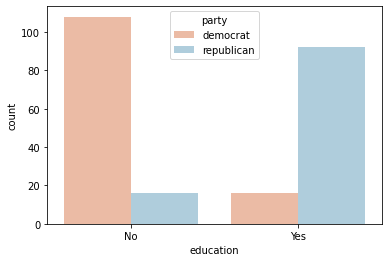

In [16]:
# count plot of the education bill
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

NOTE: the resulting plot shows the difference in voting behavior between the two parties for the 'education' bill, with each party colored differently. We manually specified the color to be 'RdBu', as the Republican party has been traditionally associated with red, and the Democratic party with blue.

**What can we interpret?**


**<span class="mark">TODO</span>**: 
* Explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills and then answer the question below

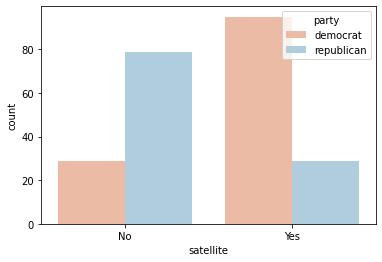

In [17]:
# Your code below -- satellite bills
# count plot of the education bill
sns.countplot(x='satellite', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

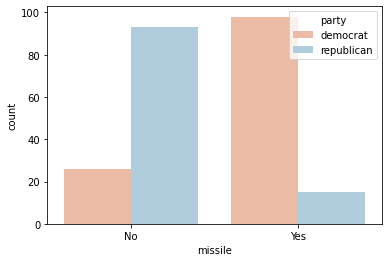

In [19]:
# Your code below -- missile bills
sns.countplot(x='missile', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

**TO ANSWER**:
Answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? 
    * a). satellite
    * b). missile
    * c). Both satellite and missile
    * d). Neither satellite nor missile

<span class="girk">Lab part 2</span>

### Classifier: fitting K-NN
Having explored the Congressional voting records dataset, it is time now to build your first classifier. Next, you will fit a k-Nearest Neighbors classifier to the voting dataset.

k-nearest neighbor:
https://scikit-learn.org/stable/modules/neighbors.html#classification

NOTE: 
* The features need to be in an array where 
    * each column is a feature and 
    * each row a different observation or data point - in this case, a Congressman's voting record. 
* The target needs to be a single column with the same number of observations as the feature data.

In [20]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### predict on new data
Having fit a k-NN classifier, you can now use it to predict the label of a new data point.

For now, we will generate a random unlabeled data point as X_new. We will next use the classifier to predict the label for this new data point. 

In [23]:
X_new = np.random.rand(1,16)

In [24]:
# Predict the labels for the training data X: y_pred
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction)) 

Prediction: ['democrat']


**Question**:
    
    Did your model predict 'democrat' or 'republican'? How sure can you be of its predictions? In other words, how can you measure its performance? 

<span class="mark">**TODO**:</span>
    
Try with another new data point. Did your model predict 'democrat' or 'republican'?